<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# !pip install -q dash
# !pip install  jupyter-dash
# !pip install -q dash_core_components
# !pip install -q dash_html_components
# !pip install -q dash_table
# !pip install pyngrok --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from google.colab import files
import io

import plotly.express as px
import plotly.graph_objects as go

''' import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 
 '''

' import dash\nimport dash_core_components as dcc\nimport dash_html_components as html\nfrom dash.dependencies import Input, Output \n '

# **Read data set csv file**

In [41]:
url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
df = pd.read_csv(url1)

In [42]:
df


,Date & Time,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE
0,FECHA_HORA,SSV_5SM_006_XS_FRQ_MEDI,SSV_5SM_006_XS_TNS_FASR,SSV_5SM_006_XS_TNS_FASS,SSV_5SM_006_XS_TNS_FAST,SSV_5SM_006_XS_INT_FASR,SSV_5SM_006_XS_INT_FASS,SSV_5SM_006_XS_INT_FAST,SSV_5SM_006_XS_VEL_WIND,SSV_5SM_006_XS_POT_MEDI,SSV_5SM_006_XS_POT_REAC,SSV_5SM_006_XS_VEL_LGMD,SSV_5SM_006_XS_PRS_PRPL,SSV_5SM_006_XS_TMP_0004,SSV_5SM_006_XS_TMP_V006,SSV_5SM_006_XS_TMP_V007,SSV_5SM_006_XS_TMP_V008,SSV_5SM_006_XS_TMP_V003,SSV_5SM_006_XS_TMP_V004,SSV_5SM_006_XS_TMP_V005,SSV_5SM_006_XS_TMP_V002,SSV_5SM_006_XS_TMP_V001,SSV_5SM_006_XS_TMP_0008,SSV_5SM_006_XS_TMP_0007
1,24/06/2021 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.8,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4
2,24/06/2021 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.5,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6
3,24/06/2021 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.7,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7
4,24/06/2021 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.1,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,24/06/2021 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.2,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4
8637,24/06/2021 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.3,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2
8638,24/06/2021 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.3,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3
8639,24/06/2021 23:59:40,50.1,582.5,577.5,576.7,270.7,272.2,268,8.4,465.7,-0.8,1512.8,177.4,30.9,32.2,61.4,73.6,95.2,90.7,94.9,53.7,43.6,62,65.3


In [43]:
df = df.drop([0])

df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df["Active Power kW"] = pd.to_numeric(df["Active Power kW"], downcast="float")
df["Wind Speed m/s"] = pd.to_numeric(df["Wind Speed m/s"], downcast="float")

def hr_func(ts):
    return ts.hour
    
df["Hour"] = pd.to_numeric(df['Date & Time'].apply(hr_func), downcast="float")

# **Whole Data Frame with All the parameters**

In [44]:
df

,Date & Time,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE,Hour
1,2021-06-24 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.799988,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4,0.0
2,2021-06-24 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.500000,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6,0.0
3,2021-06-24 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.700012,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7,0.0
4,2021-06-24 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.099976,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7,0.0
5,2021-06-24 00:00:40,50.31,593.3,585.5,589.4,421.5,421.2,430.8,10.5,744.000000,3.8,1529.8,180,31.5,34.2,70,79.6,139.2,133.6,137.3,53.7,43.8,74.3,72.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,2021-06-24 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.200012,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4,23.0
8637,2021-06-24 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.299988,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2,23.0
8638,2021-06-24 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.299988,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3,23.0
8639,2021-06-24 23:59:40,50.1,582.5,577.5,576.7,270.7,272.2,268,8.4,465.700012,-0.8,1512.8,177.4,30.9,32.2,61.4,73.6,95.2,90.7,94.9,53.7,43.6,62,65.3,23.0


# **Active Power Data Frame**

In [45]:
active_power=df['Active Power kW']
active_power=pd.DataFrame(active_power)
active_power

,Active Power kW
1,737.799988
2,745.500000
3,732.700012
4,743.099976
5,744.000000
...,...
8636,404.200012
8637,367.299988
8638,329.299988
8639,465.700012


# **Ststistics of Active Power**

In [46]:
active_power.describe()

,Active Power kW
count,8640.000000
mean,553.563354
std,158.602646
min,169.000000
25%,419.974998
50%,573.350006
75%,714.700012
max,798.400024


In [47]:
fig = px.line(df, x="Date & Time" , y="Active Power kW") 
fig.show()

In [48]:
train,test=active_power[:-640],active_power[-640:]  #seperate train and test data arrays
print(train.shape)
print(test.shape)

print(train.describe())
print(test.describe())

(8000, 1)
(640, 1)
       Active Power kW
count      8000.000000
mean        569.218750
std         152.831299
min         183.500000
25%         450.374992
50%         591.800018
75%         718.700012
max         798.400024
       Active Power kW
count       640.000000
mean        357.870392
std          79.182007
min         169.000000
25%         303.749992
50%         350.550003
75%         412.250008
max         600.700012


# **Decompose Trends,Seasons and Noise of the training data set**

<Figure size 432x288 with 0 Axes>

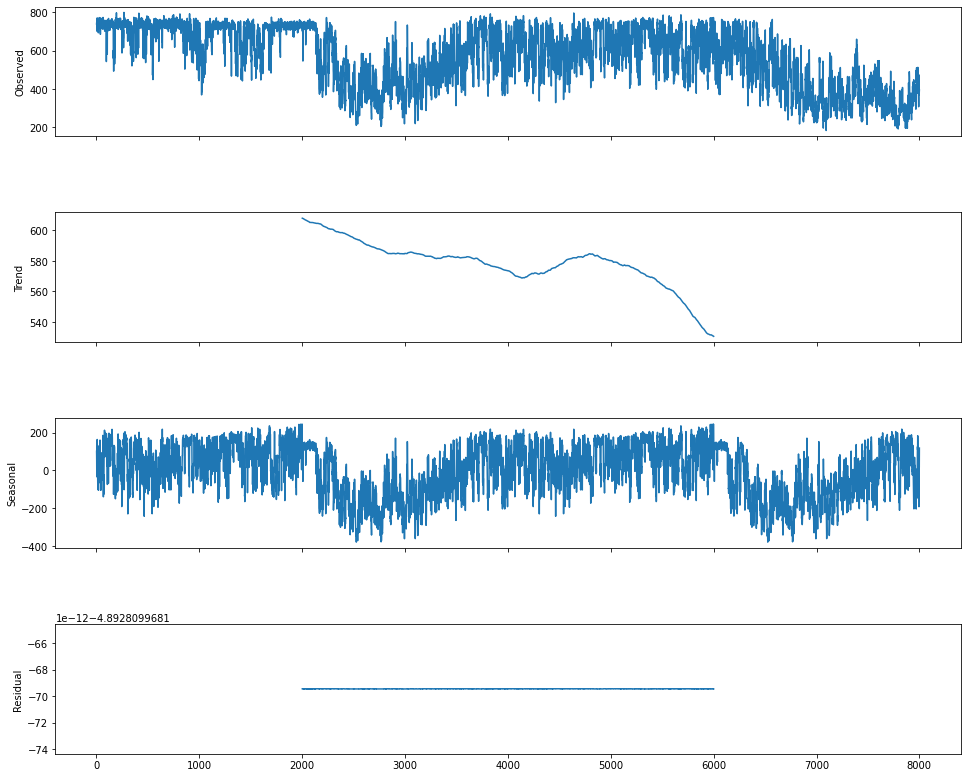

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='additive',freq=4000)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,12)

# **Autocorrealation and Partial aurocorrealations plots**

plot the ACF and PACF to know about P and Q value



 

*   Statistical correlation summarizes the strength of the relationship between two variables
*   ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot

*   ACF Determines the coefficient of MA model (p)
*   PACF is a partial auto-correlation function which is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed .Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals

*   PACF determines the coefficients of AR model (q)

KeyError: ignored

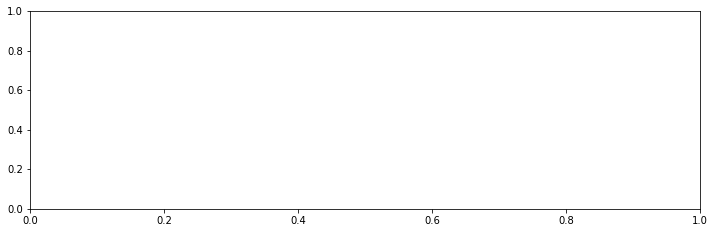

In [51]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train[0], lags=50, ax=ax1) 
# 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train[0], lags=50, ax=ax2)

In [13]:
from statsmodels.tsa.stattools import adfuller
from numpy import log


In [52]:
dataset=active_power=df['Active Power kW']
result = adfuller(dataset, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.042287225393305
p-value: 0.0012045715517920428
Critial Values:
   1%, -3.4311104339084104
Critial Values:
   5%, -2.861876060538507
Critial Values:
   10%, -2.5669488800920677


" # 2nd Differencing\naxes[2, 0].plot(train.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')\nplot_acf(train.value.diff().diff().dropna(), ax=axes[2, 1])\n\nplt.show() "

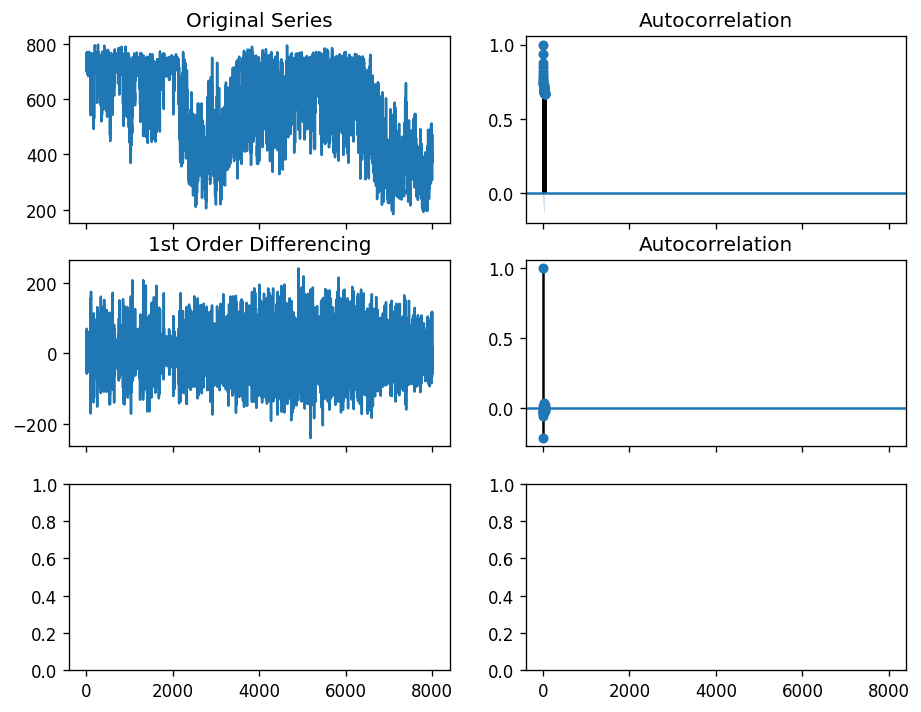

In [55]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train); axes[0, 0].set_title('Original Series')
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train.diff().dropna(), ax=axes[1, 1])

''' # 2nd Differencing
axes[2, 0].plot(train.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show() ''' 